<a href="https://colab.research.google.com/github/KrishnaSaivalluri/HSI_CNN/blob/main-2/HSI_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow

In [ ]:
!pip install earthpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 32.0 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [ ]:
import matplotlib.pyplot as plt

import numpy as np
import earthpy.plot as ep
import seaborn as sns
import earthpy.spatial as es

import plotly.graph_objects as go
import plotly.express as px

from scipy.io import loadmat

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score,
                             confusion_matrix, classification_report)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from tqdm import tqdm

In [ ]:
data = loadmat('/content/drive/MyDrive/HSI (1)/PaviaUniversity/PaviaU.mat')['paviaU']

gt = loadmat('/content/drive/MyDrive/HSI (1)/PaviaUniversity/PaviaU_gt.mat')['paviaU_gt']
gt1 = loadmat('/content/drive/MyDrive/HSI (1)/PaviaUniversity/PaviaU_gt1.mat')['paviaU_gt']

df = pd.DataFrame(data.reshape(data.shape[0]*data.shape[1], -1))

df.columns = [f'band{i}' for i in range(1, df.shape[-1]+1)]

df['class'] = gt.ravel()


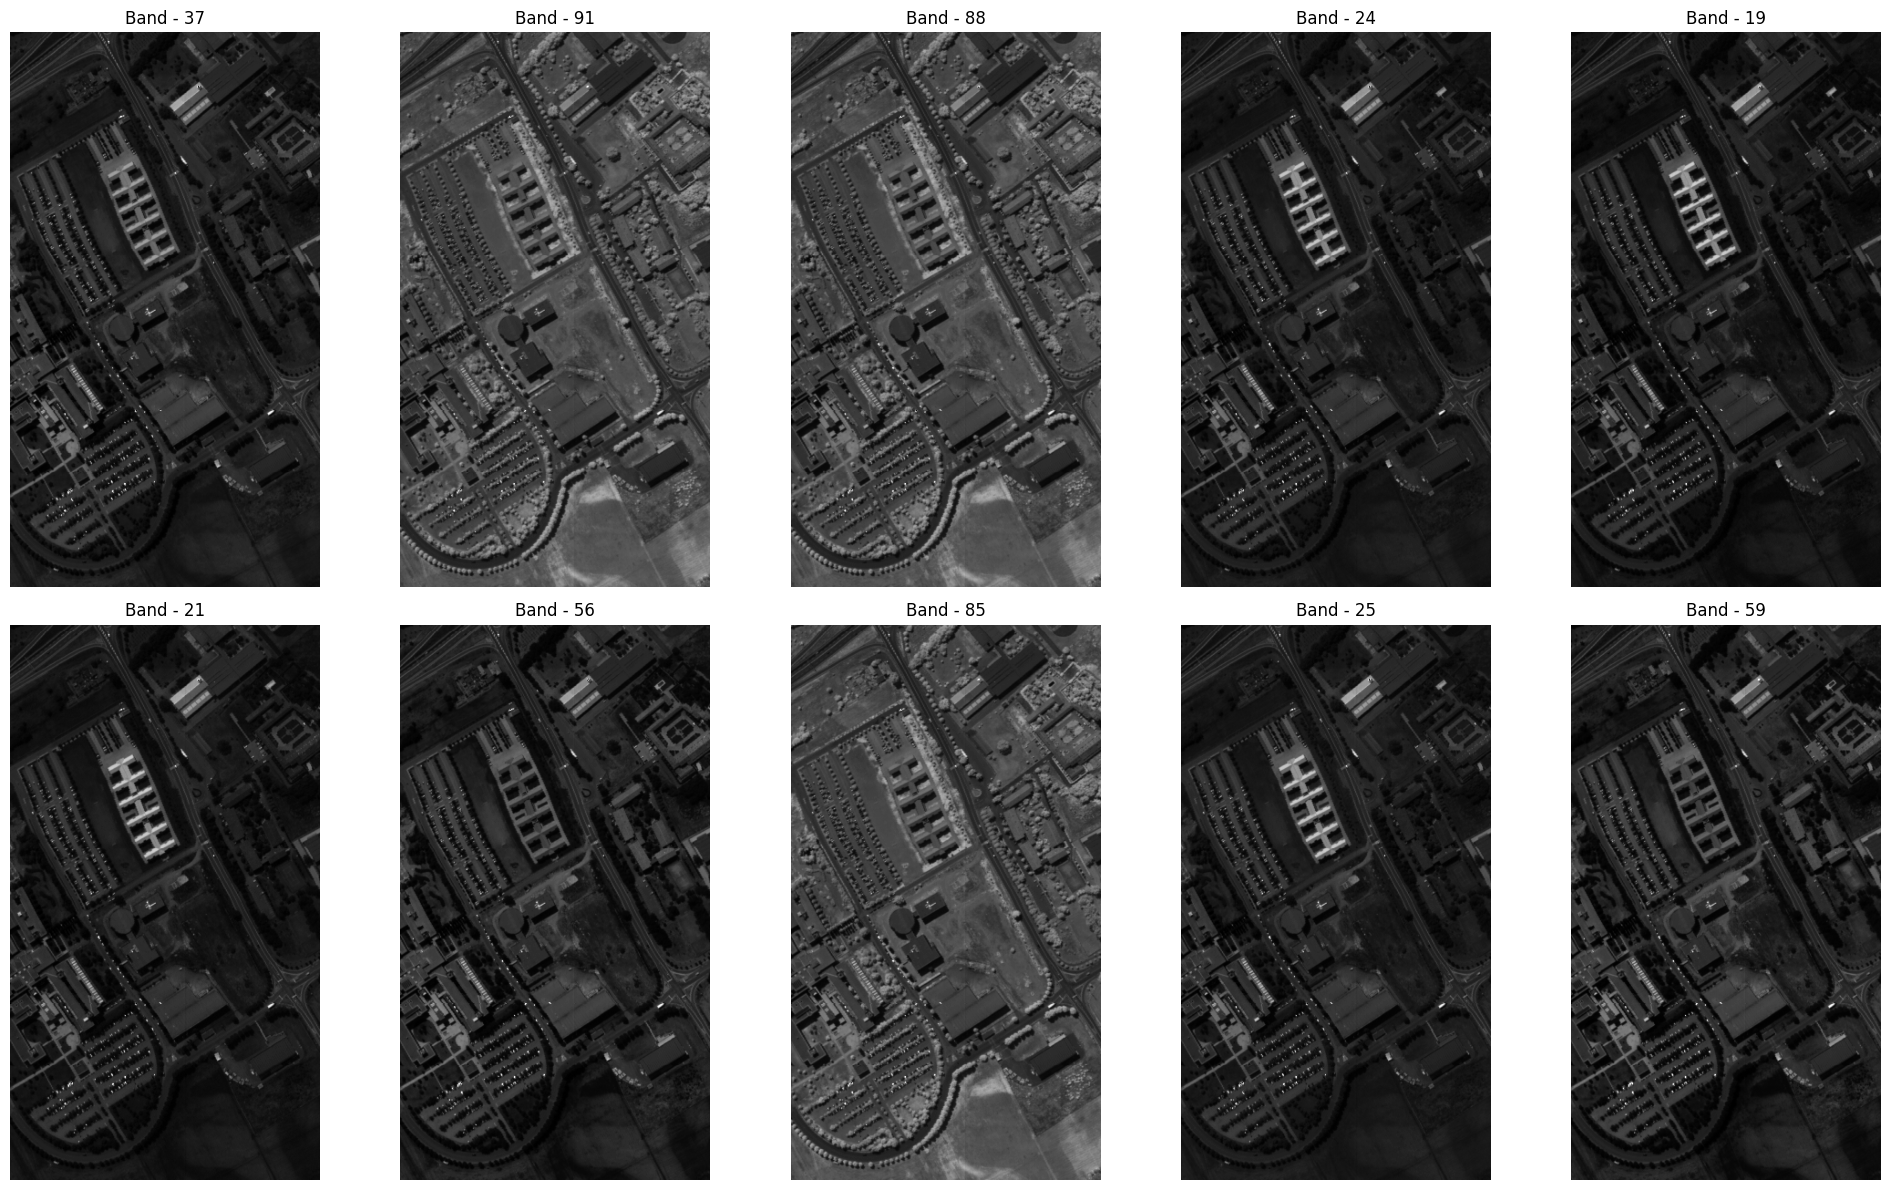

In [ ]:
fig = plt.figure(figsize = (20, 12))

ax = fig.subplots(2, 5)

for i in range(2):
  for j in range(5):
    c = np.random.randint(103)
    ax[i][j].imshow(data[:, :, c], cmap='gray')
    ax[i][j].axis('off')
    ax[i][j].title.set_text(f"Band - {c}")
    c+=1

plt.tight_layout()

plt.show()

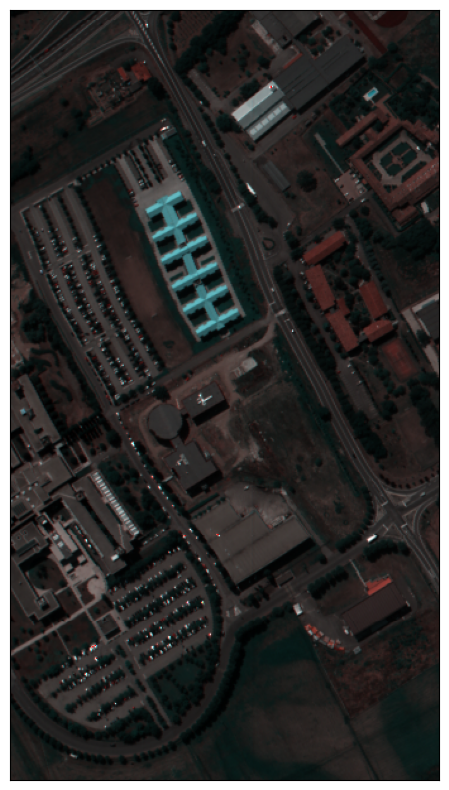

In [ ]:
mdata = np.moveaxis(data, -1, 0)

ep.plot_rgb(mdata, (60, 30, 27), figsize=(12, 10))

plt.show()

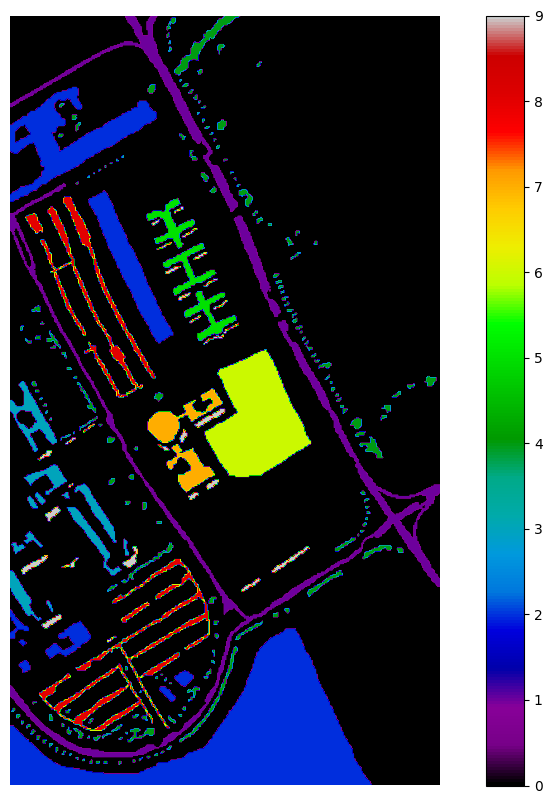

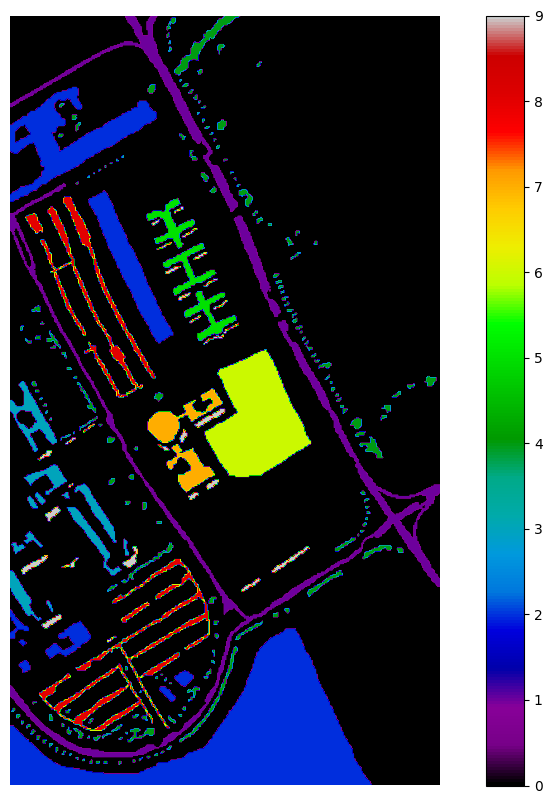

In [ ]:
def plot_data(data):
  fig = plt.figure(figsize=(12, 10))
  plt.imshow(data, cmap='nipy_spectral')
  plt.colorbar()
  plt.axis('off')
  plt.show()

plot_data(gt)
plot_data(gt1)

In [ ]:
X = df[df['class']!=0].iloc[:, :-1].values

y = tf.keras.utils.to_categorical(df[df['class']!=0].iloc[:, -1].values ,
                                  num_classes= np.unique(gt).shape[0],
                                  dtype='float32')

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, stratify = y)

print(f"Train Data: {X_train.shape}\nTest Data: {X_test.shape}")

Train Data: (29943, 103)
Test Data: (12833, 103)


In [ ]:
model = Sequential(name='Pavia_University')

model.add(Input(shape = X_train[0].shape, name = 'Input_Layer'))

model.add(BatchNormalization(name = 'BatchNormalization'))

model.add(Dense(units = 128, activation= 'relu', name = 'Layer1'))
model.add(Dense(units = 128, activation= 'relu', name = 'Layer2'))
model.add(Dense(units = 128, activation= 'relu', name = 'Layer3'))
model.add(Dense(units = 128, activation= 'relu', name = 'Layer4'))

model.add(Dropout(rate = 0.2, name = 'Dropout1',))

model.add(Dense(units = 64, activation= 'relu', name = 'Layer5'))
model.add(Dense(units = 64, activation= 'relu', name = 'Layer6'))
model.add(Dense(units = 64, activation= 'relu', name = 'Layer7'))
model.add(Dense(units = 64, activation= 'relu', name = 'Layer8'))

model.add(Dropout(rate = 0.2, name = 'Dropout2'))

model.add(Dense(units = 32, activation= 'relu', name = 'Layer9'))
model.add(Dense(units = 32, activation= 'relu', name = 'Layer10'))
model.add(Dense(units = 32, activation= 'relu', name = 'Layer11'))
model.add(Dense(units = 32, activation= 'relu', name = 'Layer12'))

model.add(Dense(units = y_train.shape[1], activation= 'softmax', name = 'Output_Layer'))

model.summary()

Model: "Pavia_University"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 BatchNormalization (BatchN  (None, 103)               412       
 ormalization)                                                   
                                                                 
 Layer1 (Dense)              (None, 128)               13312     
                                                                 
 Layer2 (Dense)              (None, 128)               16512     
                                                                 
 Layer3 (Dense)              (None, 128)               16512     
                                                                 
 Layer4 (Dense)              (None, 128)               16512     
                                                                 
 Dropout1 (Dropout)          (None, 128)               0         
                                                  

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Callbacks
es = EarlyStopping(monitor = 'val_loss',
                   min_delta = 0,
                   patience = 15,
                   verbose = 1,
                   restore_best_weights = True)

checkpoint = ModelCheckpoint(filepath = 'Pavia_University_Model.h5',
                             monitor = 'val_loss',
                             mode ='min',
                             save_best_only = True,
                             verbose = 1)
# Fit
history = model.fit(x = X_train,
          y = y_train,
          validation_data = (X_test, y_test),
          epochs = 100,
          callbacks = [es, checkpoint])

Epoch 1/100
933/936 [============================>.] - ETA: 0s - loss: 0.8461 - accuracy: 0.6921
Epoch 1: val_loss improved from inf to 0.51989, saving model to Pavia_University_Model.h5
936/936 [==============================] - 19s 14ms/step - loss: 0.8454 - accuracy: 0.6923 - val_loss: 0.5199 - val_accuracy: 0.7975
Epoch 2/100
  7/936 [..............................] - ETA: 8s - loss: 0.5381 - accuracy: 0.7679

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


936/936 [==============================] - ETA: 0s - loss: 0.5837 - accuracy: 0.7763
Epoch 2: val_loss improved from 0.51989 to 0.44580, saving model to Pavia_University_Model.h5
936/936 [==============================] - 6s 7ms/step - loss: 0.5837 - accuracy: 0.7763 - val_loss: 0.4458 - val_accuracy: 0.8148
Epoch 3/100
929/936 [============================>.] - ETA: 0s - loss: 0.5337 - accuracy: 0.8014
Epoch 3: val_loss did not improve from 0.44580
936/936 [==============================] - 8s 8ms/step - loss: 0.5345 - accuracy: 0.8010 - val_loss: 0.4516 - val_accuracy: 0.8270
Epoch 4/100
928/936 [============================>.] - ETA: 0s - loss: 0.4815 - accuracy: 0.8149
Epoch 4: val_loss improved from 0.44580 to 0.38678, saving model to Pavia_University_Model.h5
936/936 [==============================] - 5s 5ms/step - loss: 0.4822 - accuracy: 0.8147 - val_loss: 0.3868 - val_accuracy: 0.8473
Epoch 5/100
931/936 [============================>.] - ETA: 0s - loss: 0.4507 - accuracy: 0.8

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Callbacks
es = EarlyStopping(monitor = 'val_loss',
                   min_delta = 0,
                   patience = 15,
                   verbose = 1,
                   restore_best_weights = True)

checkpoint = ModelCheckpoint(filepath = 'Pavia_University_Model.h5',
                             monitor = 'val_loss',
                             mode ='min',
                             save_best_only = True,
                             verbose = 1)
# Fit
history = model.fit(x = X_train,
          y = y_train,
          validation_data = (X_test, y_test),
          epochs = 100,
          callbacks = [es, checkpoint])

Epoch 1/100
932/936 [============================>.] - ETA: 0s - loss: 0.2407 - accuracy: 0.9101
Epoch 1: val_loss improved from inf to 0.17712, saving model to Pavia_University_Model.h5
936/936 [==============================] - 10s 8ms/step - loss: 0.2409 - accuracy: 0.9101 - val_loss: 0.1771 - val_accuracy: 0.9350
Epoch 2/100
933/936 [============================>.] - ETA: 0s - loss: 0.2602 - accuracy: 0.9039
Epoch 2: val_loss improved from 0.17712 to 0.15307, saving model to Pavia_University_Model.h5
936/936 [==============================] - 5s 6ms/step - loss: 0.2601 - accuracy: 0.9039 - val_loss: 0.1531 - val_accuracy: 0.9493
Epoch 3/100
928/936 [============================>.] - ETA: 0s - loss: 0.2463 - accuracy: 0.9107
Epoch 3: val_loss did not improve from 0.15307
936/936 [==============================] - 7s 7ms/step - loss: 0.2464 - accuracy: 0.9105 - val_loss: 0.1747 - val_accuracy: 0.9385
Epoch 4/100
932/936 [============================>.] - ETA: 0s - loss: 0.2442 - accu

In [ ]:
hist = pd.DataFrame(data= history.history)

fig = go.Figure()

fig.add_trace(go.Scatter(x = hist.index, y = hist.loss.values,
                    mode='lines+markers',
                    name='Train Loss'))

fig.add_trace(go.Scatter(x = hist.index, y = hist.accuracy.values,
                    mode='lines+markers',
                    name='Train Accuracy'))

fig.add_trace(go.Scatter(x = hist.index, y = hist.val_loss.values,
                    mode='lines+markers', name='Test loss'))

fig.add_trace(go.Scatter(x = hist.index, y = hist.val_accuracy.values,
                    mode='lines+markers', name='Test Accuracy'))

fig.show()

In [ ]:
pred = np.argmax(model.predict(X_test), axis=1)

# Classification Report
print(classification_report(pred, np.argmax(y_test, 1),
      target_names = ['1. Asphalt', '2. Meadows', '3. Gravel', '4. Trees',
                 '5. Painted metal sheets','6. Bare Soil', '7. Bitumen',
                 '8. Self-Blocking Bricks', '9. Shadows']))

402/402 [==============================] - 2s 3ms/step
                         precision    recall  f1-score   support

             1. Asphalt       0.93      0.97      0.95      1916
             2. Meadows       0.98      0.98      0.98      5623
              3. Gravel       0.73      0.89      0.80       518
               4. Trees       0.93      0.97      0.95       884
5. Painted metal sheets       1.00      1.00      1.00       404
           6. Bare Soil       0.96      0.95      0.95      1526
             7. Bitumen       0.91      0.80      0.85       457
8. Self-Blocking Bricks       0.93      0.84      0.88      1221
             9. Shadows       1.00      1.00      1.00       284

               accuracy                           0.95     12833
              macro avg       0.93      0.93      0.93     12833
           weighted avg       0.95      0.95      0.95     12833



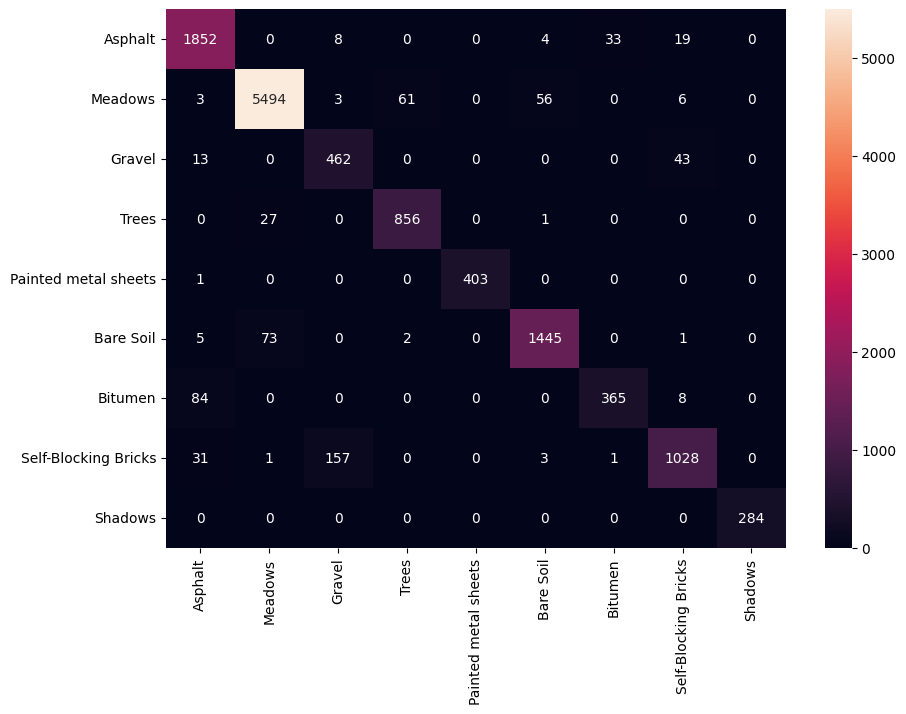

In [ ]:
plt.figure(figsize = (10,7))

classes = ['Asphalt', 'Meadows', 'Gravel', 'Trees', 'Painted metal sheets',
            'Bare Soil', 'Bitumen', 'Self-Blocking Bricks', 'Shadows']

mat = confusion_matrix(np.add(pred, 1), np.add(np.argmax(y_test, 1), 1))

df_cm = pd.DataFrame(mat, index = classes, columns = classes)

sns.heatmap(df_cm, annot=True, fmt='d')

plt.show()